# File and libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

filepath=r'dataset/df_msg_outlier_input.csv'

file_tag = "df_msg_scaling_input"

# DSLabs functions

In [3]:
%run "scripts/dslabs_functions.py"


dslabs lodaded


# Data functions

In [4]:
%run "scripts/data_functions.py"


dslabs lodaded
data_functions lodaded


# Load

In [5]:
# test_data=True
test_data=False

# use to evaluate strategies. otherwise False to just transform data 
evaluate=True
# evaluate=False

if test_data==True:

    data=pd.read_csv(filepath)

    # 1% sample
    data=data.sample(frac=0.01, replace=False)

else:
    data=pd.read_csv(filepath)
    # 50% sample
    # data=data.sample(frac=0.5, replace=False)

 
target='is_unsubscribed'
vars: list[str] = data.columns.to_list()

# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
data.sort_values(by='day_of_year', inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792359 entries, 0 to 792358
Data columns (total 42 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   platform                                 792359 non-null  float64
 1   email_provider                           792359 non-null  float64
 2   campaign_type                            792359 non-null  float64
 3   channel_cmp                              792359 non-null  float64
 4   topic                                    792359 non-null  float64
 5   total_count                              792359 non-null  float64
 6   subject_length                           792359 non-null  float64
 7   day_of_year                              792359 non-null  float64
 8   month                                    792359 non-null  float64
 9   days_diff_opened_first_time_at_sent_at   792359 non-null  float64
 10  days_diff_clicked_first_time_at_sent_

# Scale 1 - Standard Scaler

## Scale 1 strategy Application

In [6]:
from pandas import DataFrame, Series
from sklearn.preprocessing import StandardScaler


def apply_strategy_1(df: DataFrame) -> DataFrame:

    df_copy=df.copy()
    
    # this script is available in data_functions originally from DSLabs site in Outlier chapter
    
    # Separate the target column from the features
    target_data: Series = df_copy.pop(target)  # Remove the target from the dataframe for scaling
    
    # Apply scaling to only the feature columns
    transf: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(df_copy)
    df_zscore = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)
    
    # Add the target column back to the scaled dataframe
    df_zscore[target] = target_data

    return df_zscore

data_1=apply_strategy_1(data)


data_1.columns

Index(['platform', 'email_provider', 'campaign_type', 'channel_cmp', 'topic',
       'total_count', 'subject_length', 'day_of_year', 'month',
       'days_diff_opened_first_time_at_sent_at',
       'days_diff_clicked_first_time_at_sent_at',
       'days_diff_unsubscribed_at_sent_at', 'days_diff_complained_at_sent_at',
       'days_diff_purchased_at_sent_at',
       'days_diff_first_purchase_date_sent_at', 'hour_sin', 'hour_cos',
       'min_sin', 'min_cos', 'day_of_month_sin', 'day_of_month_cos',
       'day_of_week_nr_sin', 'day_of_week_nr_cos', 'week_of_month_sin',
       'week_of_month_cos', 'channel_msg', 'is_opened', 'is_clicked',
       'is_hard_bounced', 'is_soft_bounced', 'is_complained', 'is_purchased',
       'subject_with_personalization', 'subject_with_deadline',
       'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount',
       'subject_with_saleout', 'is_weekend', 'time_of_day',
       'days_diff_started_at_sent_at', 'is_unsubscribed'],
      dtype='obje

## Scale 1 Target Prep

In [7]:
data_1.columns

Index(['platform', 'email_provider', 'campaign_type', 'channel_cmp', 'topic',
       'total_count', 'subject_length', 'day_of_year', 'month',
       'days_diff_opened_first_time_at_sent_at',
       'days_diff_clicked_first_time_at_sent_at',
       'days_diff_unsubscribed_at_sent_at', 'days_diff_complained_at_sent_at',
       'days_diff_purchased_at_sent_at',
       'days_diff_first_purchase_date_sent_at', 'hour_sin', 'hour_cos',
       'min_sin', 'min_cos', 'day_of_month_sin', 'day_of_month_cos',
       'day_of_week_nr_sin', 'day_of_week_nr_cos', 'week_of_month_sin',
       'week_of_month_cos', 'channel_msg', 'is_opened', 'is_clicked',
       'is_hard_bounced', 'is_soft_bounced', 'is_complained', 'is_purchased',
       'subject_with_personalization', 'subject_with_deadline',
       'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount',
       'subject_with_saleout', 'is_weekend', 'time_of_day',
       'days_diff_started_at_sent_at', 'is_unsubscribed'],
      dtype='obje

## Scale 1 train/test split 

Labels=[0.0, 1.0]


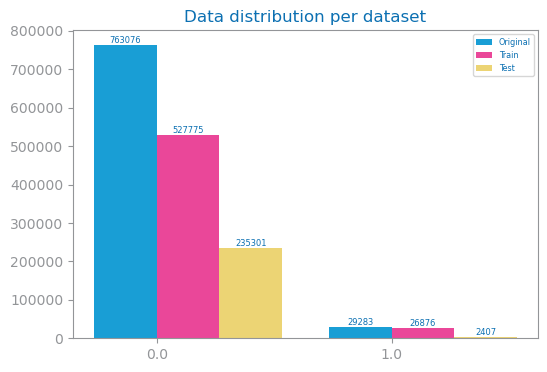

In [8]:
if evaluate ==True:
    
    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart


    # Call the function to split the data
    y_1, X_1, labels, values = define_target_and_prepare_data(data_1, target)

    train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=data_1.columns), y_1, data_columns=data_1.columns, target_column=target)


    # Distribution check
    values["Train"] = [
        len(train_1[train_1[target] == 0]),
        len(train_1[train_1[target] == 1]),
    ]
    values["Test"] = [
        len(test_1[test_1[target] == 0]),
        len(test_1[test_1[target] == 1]),
    ]

    # Visualize the distribution
    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")
    show()

## Scale 1 evaluate

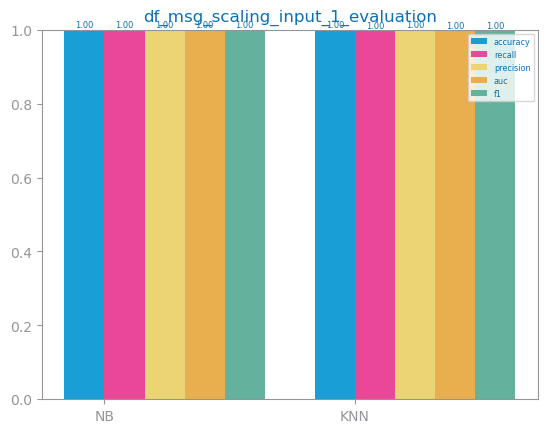

In [9]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values
if evaluate == True:
    
    figure()
    eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='is_unsubscribed', metric="recall")
    plot_multibar_chart(
        ["NB", "KNN"], eval_1, title=f"{file_tag}_1_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_1_evaluation.png")
    show()

# Scale 2 - MinMax Scaler


## Scale 2 strategy aplication

In [10]:
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler



def apply_strategy_2(df):

    df_copy=df.copy()
    
    # this script is available in data_functions originally from DSLabs site in Outlier chapter
    
    # Separate the target column from the features
    target_data: Series = df_copy.pop(target)  # Remove the target from the dataframe for scaling
    
    # Apply MinMax scaling to the feature columns only
    transf: MinMaxScaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_copy)
    df_minmax = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)
    
    # Add the target column back to the scaled dataframe
    df_minmax[target] = target_data  # Add the unscaled target column back

    return df_minmax

data_2=apply_strategy_2(data)
data_2.columns

Index(['platform', 'email_provider', 'campaign_type', 'channel_cmp', 'topic',
       'total_count', 'subject_length', 'day_of_year', 'month',
       'days_diff_opened_first_time_at_sent_at',
       'days_diff_clicked_first_time_at_sent_at',
       'days_diff_unsubscribed_at_sent_at', 'days_diff_complained_at_sent_at',
       'days_diff_purchased_at_sent_at',
       'days_diff_first_purchase_date_sent_at', 'hour_sin', 'hour_cos',
       'min_sin', 'min_cos', 'day_of_month_sin', 'day_of_month_cos',
       'day_of_week_nr_sin', 'day_of_week_nr_cos', 'week_of_month_sin',
       'week_of_month_cos', 'channel_msg', 'is_opened', 'is_clicked',
       'is_hard_bounced', 'is_soft_bounced', 'is_complained', 'is_purchased',
       'subject_with_personalization', 'subject_with_deadline',
       'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount',
       'subject_with_saleout', 'is_weekend', 'time_of_day',
       'days_diff_started_at_sent_at', 'is_unsubscribed'],
      dtype='obje

## Scale 2 train/test split 

Labels=[0.0, 1.0]


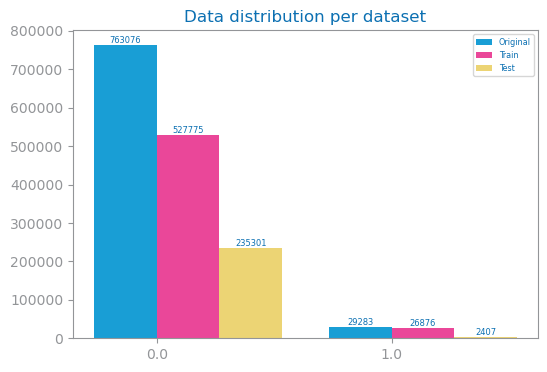

In [11]:
if evaluate==True:

    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart

    # train/test split from DSLABS Classification/Evaluation Chapter
    # created split_data_save_csv on data_functions

    # Call the functions to split the data

    y_2, X_2, labels, class_counts = define_target_and_prepare_data(data_2, target=target)

    train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=data_2.columns), y_2, data_columns=data_2.columns, target_column=target)


    values["Train"] = [
        len(train_2[train_2[target] == 0]),
        len(train_2[train_2[target] == 1]),
    ]
    values["Test"] = [
        len(test_2[test_2[target] == 0]),
        len(test_2[test_2[target] == 1]),
    ]

    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")

## Scale 2 evaluate

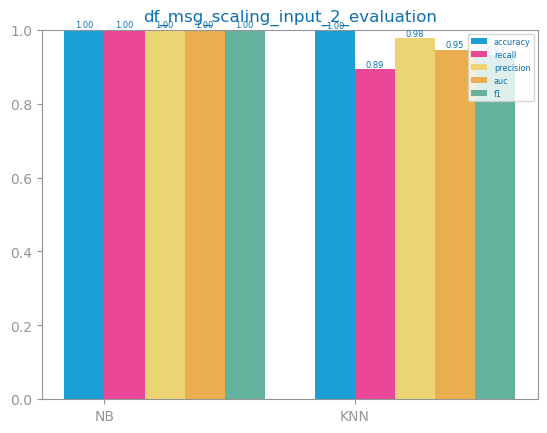

In [12]:
if evaluate == True:
    figure()
    eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='is_unsubscribed', metric="recall")
    plot_multibar_chart(
        ["NB", "KNN"], eval_2, title=f"{file_tag}_2_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_2_evaluation.png")
    show()

# scaling plot

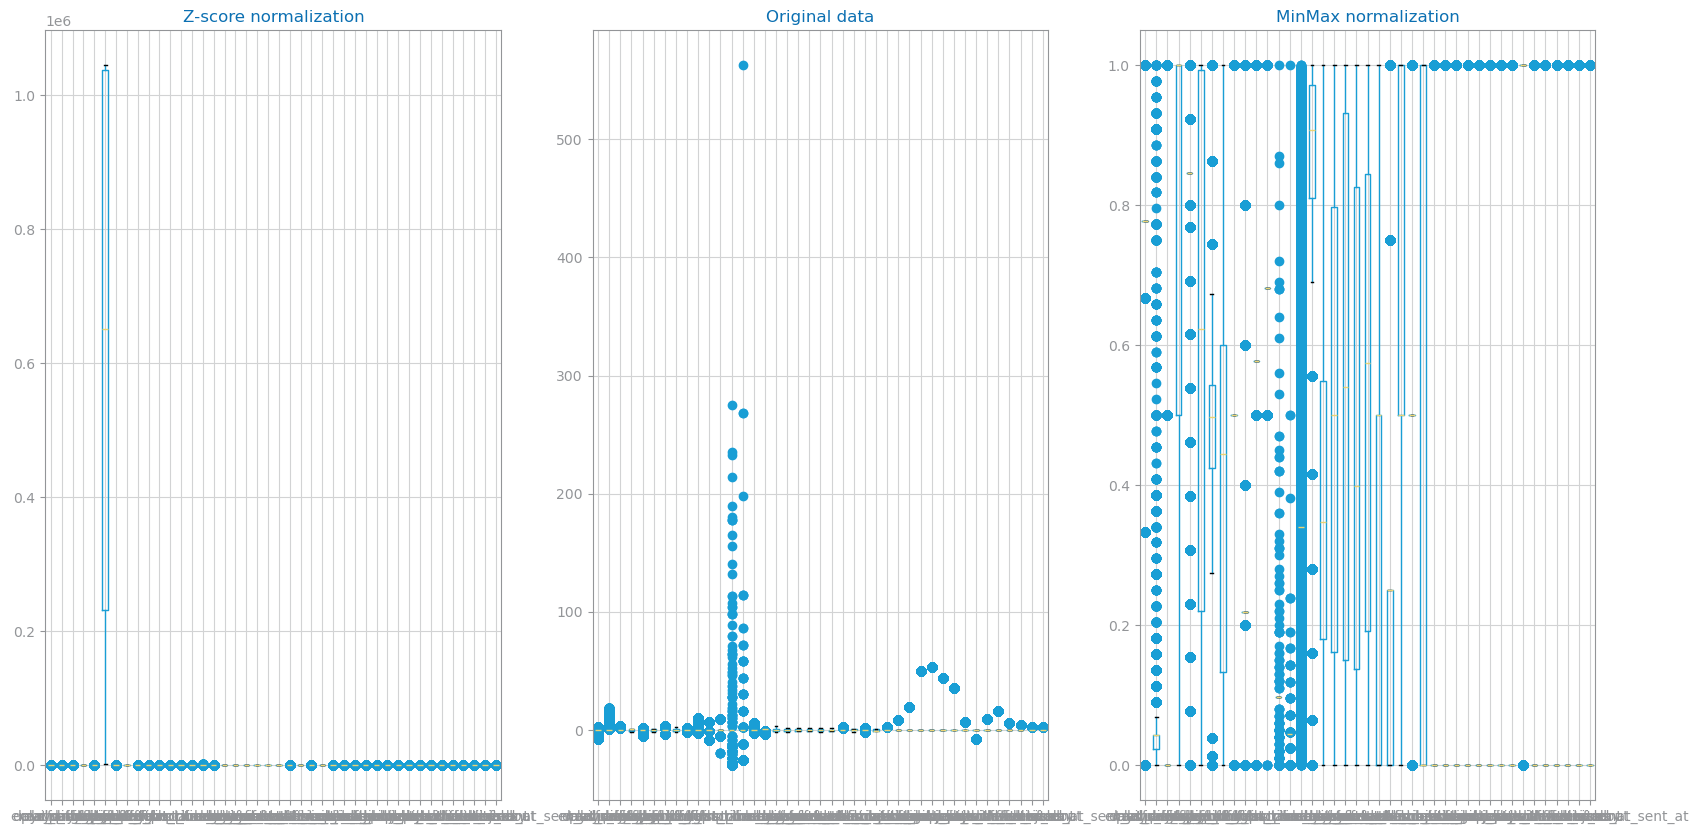

In [13]:
if evaluate == True:

    from matplotlib.pyplot import subplots, show

    fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
    axs[0, 1].set_title("Original data")
    data.boxplot(ax=axs[0, 0])

    axs[0, 0].set_title("Z-score normalization")
    data_1.boxplot(ax=axs[0, 1])

    axs[0, 2].set_title("MinMax normalization")
    data_2.boxplot(ax=axs[0, 2])
    show()

# Approach uplift comparison

## uplift df

In [14]:
if evaluate ==True:

    algorithms = ['Naive Bayes', 'KNN']

    # Create DataFrames for eval_1 and eval_2
    df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
    df_eval_2 = pd.DataFrame(eval_2, index=algorithms)

    # Calculate uplift
    df_uplift = df_eval_2 - df_eval_1



    # Combine everything into one DataFrame (without misalignment issues)
    comparison_df = pd.concat([df_eval_1, df_eval_2, df_uplift], axis=1)
    comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 2', 'Uplift'], eval_1.keys()])



    # Display the DataFrame
    display(comparison_df)

Approach 1                                         Approach 2  \
              accuracy    recall precision       auc        f1   accuracy   
Naive Bayes   1.000000  1.000000       1.0  1.000000  1.000000   1.000000   
KNN           0.999987  0.998754       1.0  0.999377  0.999376   0.998692   

                                                       Uplift            \
               recall precision       auc        f1  accuracy    recall   
Naive Bayes  1.000000  1.000000  1.000000  1.000000  0.000000  0.000000   
KNN          0.892397  0.976364  0.946088  0.932494 -0.001296 -0.106356   

                                           
            precision       auc        f1  
Naive Bayes  0.000000  0.000000  0.000000  
KNN         -0.023636 -0.053289 -0.066882

# Analysis



# save to csv

In [15]:
if test_data==False:
    
    data_save=data.copy()

    # apply winning strategy
    data_save=apply_strategy_2(data_save)
        
    data_save.to_csv(f"dataset/df_msg_scaler_input.csv", index=False)

    print(data_save.columns)

Index(['platform', 'email_provider', 'campaign_type', 'channel_cmp', 'topic',
       'total_count', 'subject_length', 'day_of_year', 'month',
       'days_diff_opened_first_time_at_sent_at',
       'days_diff_clicked_first_time_at_sent_at',
       'days_diff_unsubscribed_at_sent_at', 'days_diff_complained_at_sent_at',
       'days_diff_purchased_at_sent_at',
       'days_diff_first_purchase_date_sent_at', 'hour_sin', 'hour_cos',
       'min_sin', 'min_cos', 'day_of_month_sin', 'day_of_month_cos',
       'day_of_week_nr_sin', 'day_of_week_nr_cos', 'week_of_month_sin',
       'week_of_month_cos', 'channel_msg', 'is_opened', 'is_clicked',
       'is_hard_bounced', 'is_soft_bounced', 'is_complained', 'is_purchased',
       'subject_with_personalization', 'subject_with_deadline',
       'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount',
       'subject_with_saleout', 'is_weekend', 'time_of_day',
       'days_diff_started_at_sent_at', 'is_unsubscribed'],
      dtype='obje

## train test csv

In [16]:
if test_data==False:
    
    data_save_copy=data_save.copy()
    
    y, X, labels, class_counts = define_target_and_prepare_data(data_save_copy, target=target)

    train, test = split_data_save_csv(pd.DataFrame(X, columns=data_save_copy.columns), y, data_columns=data_save_copy.columns, target_column=target)  
    
    train.to_csv(f"dataset/df_msg_scaler_input_train.csv", index=False)
    print(train.columns)
    
    test.to_csv(f"dataset/df_msg_scaler_input_test.csv", index=False)
    print(test.columns)

Labels=[0.0, 1.0]
Index(['platform', 'email_provider', 'campaign_type', 'channel_cmp', 'topic',
       'total_count', 'subject_length', 'day_of_year', 'month',
       'days_diff_opened_first_time_at_sent_at',
       'days_diff_clicked_first_time_at_sent_at',
       'days_diff_unsubscribed_at_sent_at', 'days_diff_complained_at_sent_at',
       'days_diff_purchased_at_sent_at',
       'days_diff_first_purchase_date_sent_at', 'hour_sin', 'hour_cos',
       'min_sin', 'min_cos', 'day_of_month_sin', 'day_of_month_cos',
       'day_of_week_nr_sin', 'day_of_week_nr_cos', 'week_of_month_sin',
       'week_of_month_cos', 'channel_msg', 'is_opened', 'is_clicked',
       'is_hard_bounced', 'is_soft_bounced', 'is_complained', 'is_purchased',
       'subject_with_personalization', 'subject_with_deadline',
       'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount',
       'subject_with_saleout', 'is_weekend', 'time_of_day',
       'days_diff_started_at_sent_at', 'is_unsubscribed'],